# Computer Vision Project 1

In [388]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Histogram Equalization

In [389]:
#load image
img = cv2.imread('./detective.png', cv2.IMREAD_GRAYSCALE)

In [390]:
#Defice a function that creates the histogram of an image
def create_pdf(im_in):
    pdf = np.zeros(256)
    # calculate the histogram of the image
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            pdf[im_in[i,j]] += 1
    # normalize
    pdf = pdf/(im_in.shape[0]*im_in.shape[1])
    return pdf

In [391]:
# Define a function that returns the cdf of the pdf the image
def create_cdf(pdf):
    #cdf
    total_pix = 0
    cdf = np.zeros(256)
    for i in range(256):
        total_pix += pdf[i]
        cdf[i] = total_pix
    return cdf

In [392]:
# Define the function that applies "Histogram equalization" on a given input image
def histogram_equalization(im_in):
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)
    eq_im = np.zeros(im_in.shape)
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            eq_im[i,j] = 255*(cdf[im_in[i,j]]-cdf_min)/(cdf_max-cdf_min)
    return eq_im

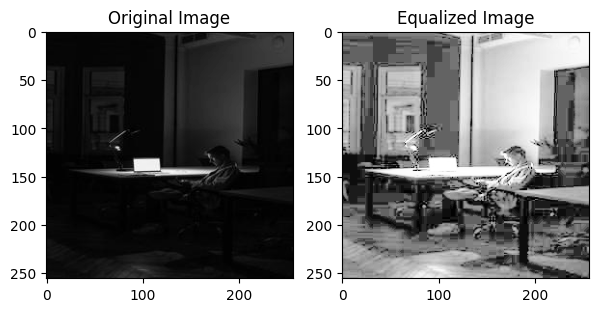

In [393]:
eq_img = histogram_equalization(img)
# Display the original image and that after histogram equalization
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

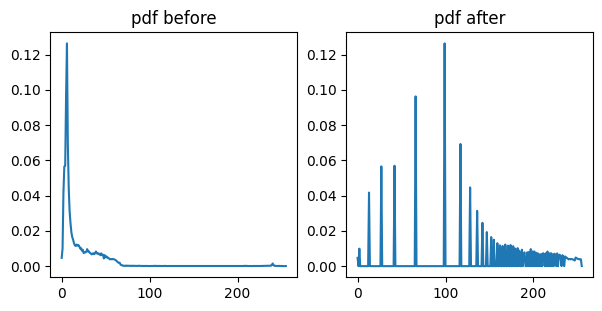

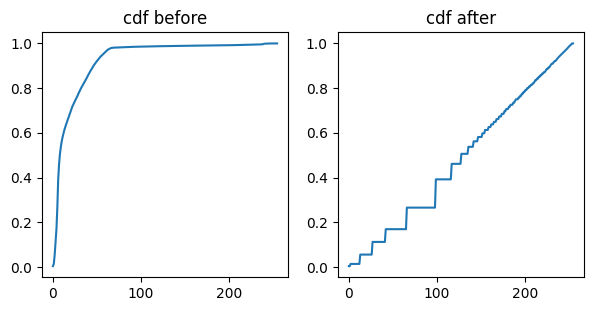

In [394]:
# Plot the pdf, cdf and image before and after histogram equalization
pdf_before = create_pdf(img)
cdf_before = create_cdf(pdf_before)
eq_img = eq_img.astype(np.uint8)
pdf_after = create_pdf(eq_img)
cdf_after = create_cdf(pdf_after)

# show the pdf of image before and after histogram equalization
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.plot(pdf_before)
plt.title('pdf before')

plt.subplot(222)
plt.plot(pdf_after)
plt.title('pdf after')

plt.show()
# show the cdf of image before and after histogram equalization
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.plot(cdf_before)
plt.title('cdf before')

plt.subplot(222)
plt.plot(cdf_after)
plt.title('cdf after')
plt.show()


**Provide a detailed comparative discussion of the PDF and CDF plots. Relate them to the Image's contrast and density.**

The pdf plot gives the distribution of pixel intensity, which shows the number of pixels corresponding to each intensity value. Pdf indicates how pixel intensities are distributed, with peaks representing frequent intensities and the valleys meaning less frequent intensity levels. A pdf with multiple peaks and valleys generally signifies high contrast,abd  pixel intensities are more uniformly distributed, making it difficult to distinguish features.
    
The cdf represents the cumulative probability of pixel intensities being less than or equal to a given value. It starts from zero and then one, giving overall intensity distribution and its impact on image. The cdf is crucial in histogram equalization, to remap the pixel intensities and  enhance contrast. Hence, the process stretches the range of intensities, improving feature visibility. The steepness of the cdf curve indicates intensity frequency.

By analyzing the pdf, we can identify regions of high and low intensity distribution. The corresponding cdf helps adjust pixel values to spread intensities more evenly across the range (0-255 for grayscale images), enhancing contrast and visual quality.
    
The characteristics of the pdf and cdf influence how pixel intensities are perceived. A well-distributed pdf results in a cdf that better maps intensities, allowing clearer distinctions between image features. After histogram equalization, the pdf ideally shows a uniform distribution, and the cdf covers the entire intensity range. This transformation enhances details, resulting in a more informative and visually appealing image.

## 2. mage Thresholding

In [395]:
# Load image
image_cell = cv2.imread('./TEM cell.png', cv2.IMREAD_GRAYSCALE)

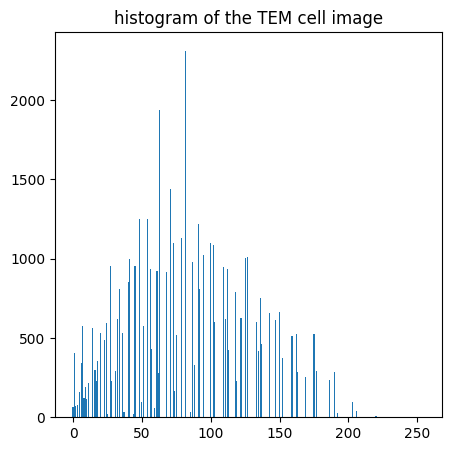

In [396]:
# Plot the histogram of the image using the functions you created for Q1
img2 = create_pdf(image_cell)
img2 = img2*image_cell.shape[0]*image_cell.shape[1]
plt.figure(figsize=(5,5))
plt.bar(range(256), img2)
plt.title('histogram of the TEM cell image')
plt.show()


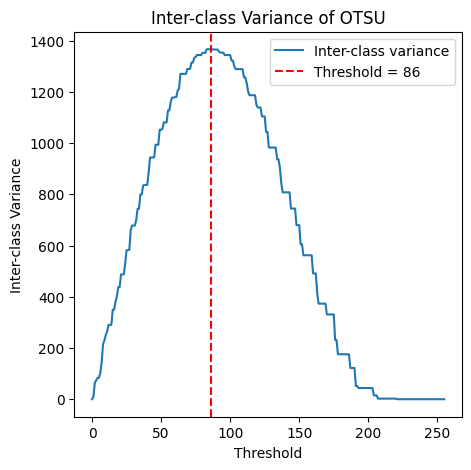

In [397]:
# Apply Otsu Thresholding and generate a plot of the inter-class variance
def otsu_thresholding(im_in):
    pdf = create_pdf(im_in) * im_in.shape[0]* im_in.shape[1]
    total_pixel = im_in.shape[0]*im_in.shape[1]
    g_max = 0
    threshold = 0
    inter_class_variance = np.zeros(256) # inter-class variance
    for i in range(256):
        n_0 = pdf[:i].sum() # foreground pixels
        n_1 = pdf[i:].sum() # background pixels
        
        mu_0 = 0 # mean of foreground pixels
        mu_1 = 0 # mean of background pixels
        
        for k in range(i):
            mu_0 += k*pdf[k]
        for k in range(i, 256):
            mu_1 += k*pdf[k]
        if n_0 == 0 or n_1 == 0:
            inter_class_variance[i] = 0
            continue

        mu_0 = mu_0/n_0
        mu_1 = mu_1/n_1
        
        omega_0 = n_0/total_pixel # probability of foreground pixels
        omega_1 = n_1/total_pixel # probability of background pixels
        
        g = omega_0 * omega_1 * (mu_0 - mu_1)**2
        inter_class_variance[i] = g
        if g > g_max:
            g_max = g
            threshold = i
    return inter_class_variance, threshold

inter_class_variances, threshold = otsu_thresholding(image_cell)

# Plot inter-class variance as a function of threshold
plt.figure(figsize=(5,5))
plt.plot(inter_class_variances, label='Inter-class variance')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Inter-class Variance of OTSU')
plt.xlabel('Threshold')
plt.ylabel('Inter-class Variance')
plt.legend()
plt.show()

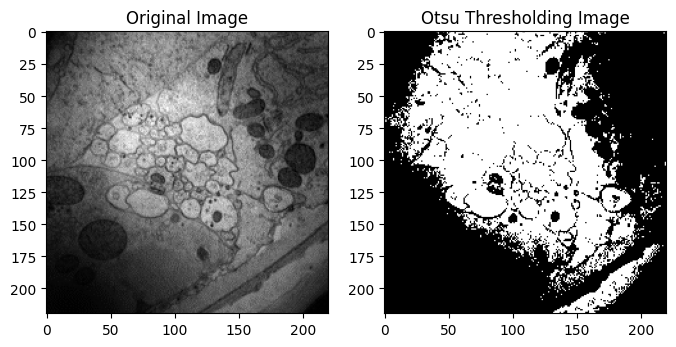

In [398]:
def otsu_thresholding_image(im_in, threshold):
    im_out = im_in.copy()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            if im_in[i,j] > threshold:
                im_out[i,j] = 255
            else:
                im_out[i,j] = 0
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.imshow(im_in, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(im_out, cmap='gray')
    plt.title('Otsu Thresholding Image')
    plt.show()
otsu_thresholding_image(image_cell, threshold)

**Display the Otsu thresholded image and discuss the results**

After applying the Otsu's thresholding, we get a binary image that converts the pixel values into black or white. The algorithm automatically selects the optimal threshold by maximizing the inter-class variance, setting pixels with intensity above the threshold as 1 (white) and pixels with intensity below it as 0 (black). This algorithm analysis the pixel distribution and try to find an optimal threshold that can distinguish between the foreground and background.

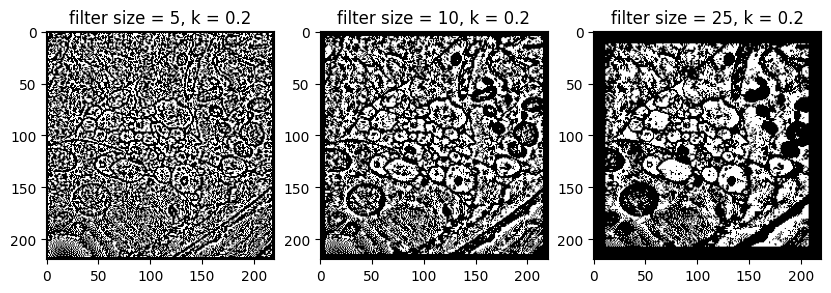

In [399]:
# Implement Niblack's Thresholding Algorithm
def niblack_thresholding(im_in, window_size, k):
    im_out = im_in.copy()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            if i < window_size//2 or j < window_size//2 or i >= im_in.shape[0]-window_size//2 or j >= im_in.shape[1]-window_size//2:
                im_out[i,j] = 0
                continue
            window = im_in[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1]
            mean = np.mean(window)
            std = np.std(window)
            threshold = mean + k*std
            if im_in[i,j] > threshold:
                im_out[i,j] = 255
            else:
                im_out[i,j] = 0
    return im_out
#show 3 different results of Niblack's thresholding with different filter sizes
plt.figure(figsize=(10,10))
plt.subplot(131)
im_out = niblack_thresholding(image_cell, 5, 0.2)
plt.imshow(im_out, cmap='gray')
plt.title('filter size = 5, k = 0.2')
plt.subplot(132)
im_out = niblack_thresholding(image_cell, 10, 0.2)
plt.imshow(im_out, cmap='gray')
plt.title('filter size = 10, k = 0.2')
plt.subplot(133)
im_out = niblack_thresholding(image_cell, 25, 0.2)
plt.imshow(im_out, cmap='gray')
plt.title('filter size = 25, k = 0.2')
plt.show()

**Discuss the outputs of the two thresholded images based on the results you got**

For Otsu's algorithm, it can generate a binary image that separates foreground from background based on global pixel distribution effectively. The result is less sensitive to local changes, and also it can preserve important structures. But it seems difficult for the algorithm to process images uneven lighting. For Niblack algorithm, It adapts well to local conditions and is therefore effective for images with different lighting or contrast. Also, it is able to detect small structures very well, which is useful in images where detail needs to be captured. Filter size and The choice of $k$ will significantly affect the results, wrong settings will lead to excessive noise.

## 3. Template Matching

In [400]:
# Load "colored" image
main_image = cv2.imread('./snow.jpg')
template_image = cv2.imread('./snowtemp.jpg')

In [401]:
# Create a function to perform template matching
def template_matching(main_image, template_image):
    # transform the images to grayscale
    main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
    template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
    # get the height and width of the main image and the template image
    height, width = main_image.shape
    template_height, template_width = template_image.shape
    
    # initialize the result_x, result_y, max_corr, and result_image
    result_x, result_y = 0, 0
    max_peak = 0 # maximum correlation peak
    result_image = np.zeros((height-template_height+1, width-template_width+1))
    
    # List to store coordinates and values above threshold
    coordinates_above_threshold = []
    threshold = 0.9  # Define the threshold as 90% of max_peak
    
    #template mean and std
    template_mean = np.mean(template_image)
    template_std = np.std(template_image)
    
    for i in range(height-template_height+1):
        for j in range(width-template_width+1):
            temp_window = main_image[i:i+template_height, j:j+template_width]
            temp_window_mean = np.mean(temp_window)
            temp_window_std = np.std(temp_window)
            # calculate the correlation, by using the formula in the slides
            if temp_window_std > 0 and template_std > 0:
                result_image[i,j] = np.sum((temp_window-temp_window_mean)*(template_image-template_mean))/(temp_window_std*template_std)
                if result_image[i,j] > max_peak: # find the maximum correlation peak
                    max_peak = result_image[i,j]
                    result_y = i
                    result_x = j
                 # Check if the current result is above the threshold
                if result_image[i, j] > threshold * max_peak:
                    coordinates_above_threshold.append((i, j, result_image[i, j]))
    return result_x, result_y, result_image, max_peak, coordinates_above_threshold

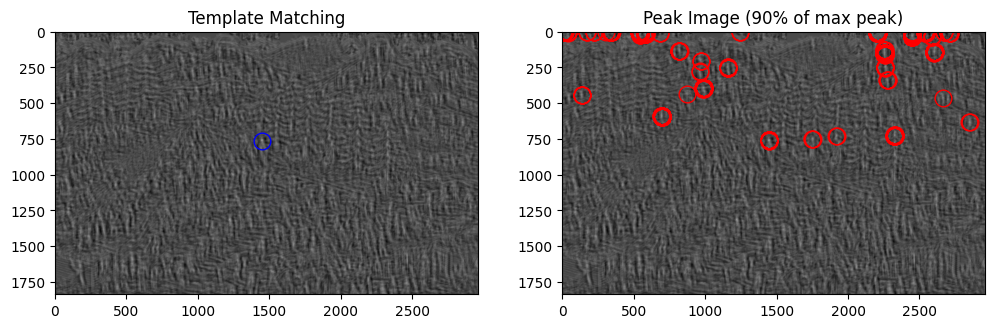

In [402]:
# Plot the output of template matching along with a thresholded output with the peak
def plot_matching_results(main_image, result_image, result_x, result_y, coordinates_above_threshold):
    # plot the 100% of max peak and 90% of max peak in the same line with 2 subplots
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(result_image, cmap='gray')
    plt.plot(result_x, result_y, 'bo', markersize=12, markerfacecolor='none', markeredgewidth=1)
    plt.title('Template Matching')
    plt.subplot(122)
    plt.imshow(result_image, cmap='gray')
    plt.title('Peak Image (90% of max peak)')
    for i, j, value in coordinates_above_threshold:
        plt.plot(j, i, 'ro', markersize=12, markerfacecolor='none', markeredgewidth=1)
    plt.show()
    
result_x, result_y, result_image, max_peak, coordinates_above_threshold = template_matching(main_image, template_image)
plot_matching_results(main_image, result_image, result_x, result_y, coordinates_above_threshold)


**Discuss if the peak matches your expectations. Discuss the appearance of peaks at different threshold levels along with plotting them.**

See Figure, the left part of it shows the final result after using the template matching algorithm. I successfully find the maximum peak value and I label it in the image by using blue circle. This location matches my expectations because it is the brightest point in the picture. And also, we try to label this location in the original image which shows in Figure down, we can see that the final result fit the template.

  I also labeled other peaks (90\% of the maximum peak). See the right part. The presence of these peaks may be due to similar textures or patterns in the image. By observing the correlation values of these peaks, I find that their values are significantly lower than the global peak, indicating that their matching degree with the target template is low.

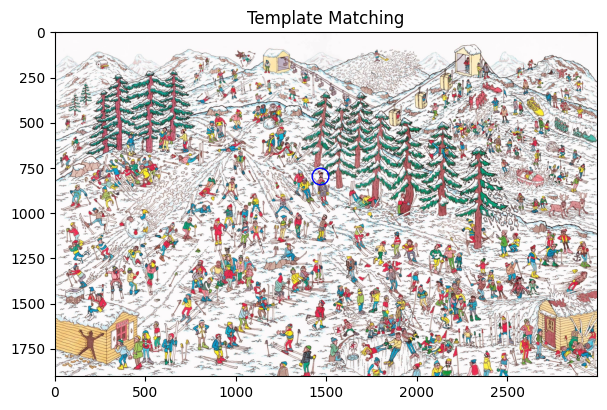

In [403]:
# Plot the found peak on the original image and highlight it

# move the result point from the top-left corner to the center of the template image
center_x, center_y = result_x + template_image.shape[1]//2, result_y + template_image.shape[0]//2
# plot the result of template matching, with blue circle
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))
plt.imshow(main_image)
plt.plot(center_x, center_y, 'bo', markersize=12, markerfacecolor='none', markeredgewidth=1)
plt.title('Template Matching')
plt.show()

In [404]:
# Load "colored" image
main_image = cv2.imread('./WaldoBeach.jpg')
template_image = cv2.imread('./WaldoBeachtemp.jpg')

In [405]:
def cal_integral_image(image): # integral image
    integral_img = np.zeros((image.shape[0] + 1, image.shape[1] + 1), dtype=np.float64)
    integral_img[1:, 1:] = np.cumsum(np.cumsum(image, axis=0), axis=1)
    return integral_img

def squared_diff(integral_image,  height_template, width_template, x, y): # fast squared difference
    top_left = integral_image[y, x]
    top_right = integral_image[y, x + width_template]
    btm_left = integral_image[y + height_template, x]
    btm_right = integral_image[y + height_template, x + width_template]
    curr_sum = btm_right - btm_left - top_right + top_left
    return curr_sum

def build_pyramid(input_image, max_level): # Gaussian Pyramid
    pyramid = [input_image]
    while len(pyramid) < max_level:
        downsampling = input_image[::2, ::2]
        pyramid.append(downsampling)
        input_image = downsampling
    return pyramid

def template_mtching_pyr(image, template):
    max_level = 4 # maximum level, default is 4, can be changed
    template_pyramid = build_pyramid(template, max_level)
    main_pyramid = build_pyramid(image, max_level)
    result_x = 0
    result_y = 0
    for level in range(max_level - 1, -1, -1):
        curr_image = main_pyramid[level]
        curr_template = template_pyramid[level]

        if level < max_level - 1:
            scale = 2 ** (max_level - 1 - level)
            result_x = int(result_x / scale)
            result_y = int(result_y / scale)
        # get the integral image    
        integral_image = cal_integral_image(curr_image)
        best_score = float('inf')
        temp_height, temp_width = curr_template.shape
        # step size for sliding window
        step_size = max(1, 2 ** (max_level - level - 1))

        # scale the template size
        for y in range(0, curr_image.shape[0] - temp_height + 1, step_size):
            for x in range(0, curr_image.shape[1] - temp_width + 1, step_size):
                score = squared_diff(integral_image, temp_height, temp_width, x, y)
                # update the best score
                if score < best_score:
                    result_x = x
                    result_y = y
                    best_score = score
    return result_x, result_y


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


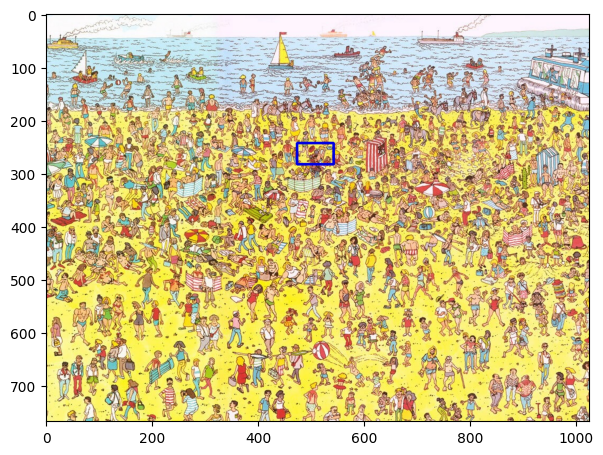

In [407]:
%time
def draw_bounding_box(image, x,y, size):
    # Draw bounding box
    output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    width_template, height_template = size
    cv2.rectangle(output_image, (x - width_template//2, y - height_template //2 ), (x + width_template, y + height_template), (0, 0, 225), 3)
    return output_image

# calculate the result location
result_x, result_y = template_mtching_pyr(cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY), cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY))

# draw bounding box
output_image = draw_bounding_box(main_image, result_x, result_y, cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY).shape)

# show the result
plt.figure(figsize=(7,7))
plt.imshow(output_image)
plt.show()
